### Contents:
- [Loading of Libraries](#Loading-of-Libraries) 
- [Model Tuning](#Model-Tuning)
  - [Data Import and Cleaning](#Data-Import-and-Cleaning)
  - [Data Preprocessing](#Data-Preprocessing)
  - [Modelling](#Modelling)
  - [Regularisation](#Regularisation)
  - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Pipeline](#Pipeline)
- [Making Predictions](#Making-Predictions)
- [Kaggle Data Preparation](#Kaggle-Data-Preparation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Limitations](#Limitations)

## Loading of Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Model Tuning

## Data Import and Cleaning
- Load dataset
- Check for missing values and datatype
- Rename columns when necessary
- Drop unnecessary columns

#### Load Data

In [2]:
# Load data
housing = pd.read_csv('../datasets/train.csv')
print(housing.shape)
housing.head()

/var/folders/w4/cdf3yttj10d7ynthq7lkp5fh0000gn/T/ipykernel_52465/2126435666.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('../datasets/train.csv')


(150634, 77)


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

#### Check for missing values and datatype

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

There are missing values in `Mall_Nearest_Distance`, `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km`, `Hawker_Within_500m`, `Hawker_Within_1km`, `Hawker_Within_2km` columns

In [4]:
# Columns were checked for unique values before deciding on which datatype to change, which col to rename and drop
# for e.g.
housing['residential'].unique()

array(['Y'], dtype=object)

In [5]:
# Change datatype to reflect columns correctly
housing['Tranc_YearMonth'] = pd.to_datetime(housing['Tranc_YearMonth'])
housing['residential'] = housing['residential'].map({'Y': True, 'N': False})
housing['commercial'] = housing['commercial'].map({'Y': True, 'N': False})
housing['market_hawker'] = housing['market_hawker'].map({'Y': True, 'N': False})
housing['multistorey_carpark'] = housing['multistorey_carpark'].map({'Y': True, 'N': False})
housing['precinct_pavilion'] = housing['precinct_pavilion'].map({'Y': True, 'N': False})
housing['bus_interchange'] = housing['bus_interchange'].map({1: True, 0: False})
housing['mrt_interchange'] = housing['mrt_interchange'].map({1: True, 0: False})
housing['pri_sch_affiliation'] = housing['pri_sch_affiliation'].map({1: True, 0: False})
housing['affiliation'] = housing['affiliation'].map({1: True, 0: False})
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  int64         
 1   Tranc_YearMonth            150634 non-null  datetime64[ns]
 2   town                       150634 non-null  object        
 3   flat_type                  150634 non-null  object        
 4   block                      150634 non-null  object        
 5   street_name                150634 non-null  object        
 6   storey_range               150634 non-null  object        
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  object        
 9   lease_commence_date        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  Tranc_Year                 150634 non-null  int64   

Datatypes are reflected correctly, except `postal` which will be dropped so need not be corrected.

#### Rename columns when necessary

In [6]:
# Rename columns
housing.rename(columns={"Tranc_YearMonth": "tranc_year_month", 
                        "lease_commence_date": "lease_commence_year", 
                        "Tranc_Year": "tranc_year",
                        "Tranc_Month": "tranc_month",
                        "lower": "lower_storey_range",
                        "upper": "upper_storey_range",
                        "mid": "mid_storey_range",
                        "1room_sold": "1room_res",
                        "2room_sold": "2room_res",
                        "3room_sold": "3room_res",
                        "4room_sold": "4room_res",
                        "5room_sold": "5room_res",
                        "exec_sold": "exec_res",
                        "multigen_sold": "multigen_res",
                        "studio_apartment_sold": "studio_res",
                        "Latitude": "latitude",
                        "Longitude": "longitude",
                        "Mall_Nearest_Distance": "mall_nearest_distance",
                        "Mall_Within_500m": "mall_500m",
                        "Mall_Within_1km": "mall_1km",
                        "Mall_Within_2km": "mall_2km",
                        "Hawker_Nearest_Distance": "hawker_nearest_distance",
                        "Hawker_Within_500m": "hawker_500m",
                        "Hawker_Within_1km": "hawker_1km",
                        "Hawker_Within_2km": "hawker_2km",
                        "hawker_food_stalls": "hawker_stalls",
                        "bus_interchange": "mrt_bus_interchange"
                        }, inplace=True)
housing.head(2)

id tranc_year_month             town flat_type block       street_name  \
0   88471       2016-05-01  KALLANG/WHAMPOA    4 ROOM    3B  UPP BOON KENG RD   
1  122598       2012-07-01           BISHAN    5 ROOM   153      BISHAN ST 13   

  storey_range  floor_area_sqm flat_model  lease_commence_year  ...  vacancy  \
0     10 TO 12            90.0    Model A                 2006  ...       78   
1     07 TO 09           130.0   Improved                 1987  ...       45   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                 True          1.317659         103.882504   
1                 True          1.349783         103.854529   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224       False         1.317659         103.882504  
1           232       False         1.350110         103.854892  

[2 rows x 77 columns]

#### Check for missing values and datatype

In [7]:
# Look at values for malls
housing.loc[:5, ['mall_nearest_distance', 'mall_500m', 'mall_1km', 'mall_2km']]

mall_nearest_distance  mall_500m  mall_1km  mall_2km
0            1094.090418        NaN       NaN       7.0
1             866.941448        NaN       1.0       3.0
2            1459.579948        NaN       NaN       4.0
3             950.175199        NaN       1.0       4.0
4             729.771895        NaN       1.0       2.0
5             684.004001        NaN       3.0       6.0

In [8]:
# Look at the different values in `mall_nearest_distance`
housing['mall_nearest_distance'].unique()

array([1094.090418 ,  866.9414477, 1459.579948 , ...,  362.8644234,
       1034.645191 , 1699.150022 ])

In [9]:
# Check for null values in `mall_nearest_distance`
housing.loc[housing['mall_nearest_distance'].isna(), 'mall_nearest_distance']

75       NaN
321      NaN
478      NaN
643      NaN
691      NaN
          ..
150296   NaN
150388   NaN
150394   NaN
150479   NaN
150625   NaN
Name: mall_nearest_distance, Length: 829, dtype: float64

In [10]:
# Find the percentage of rows with null values
829/150634

0.005503405605640161

Since the number of rows with null values in `mall_nearest_distance` is less than 1%, the rows can be dropped. For the purpose of the Kaggle submission, the column will be dropped instead.

In [11]:
# Look at the different values in `mall_500m`
housing['mall_500m'].unique()

array([nan,  1.,  3.,  4.,  2.,  5.,  6.])

In [12]:
# Look at the different values in `mall_1km`
housing['mall_1km'].unique()

array([nan,  1.,  3.,  2.,  5.,  4., 11.,  6., 10.,  7., 15., 14.,  8.,
        9., 12., 13.])

In [13]:
# Look at the different values in `mall_2km`
housing['mall_2km'].unique()

array([ 7.,  3.,  4.,  2.,  6.,  8.,  1.,  5., 27., 10.,  9., 30., 20.,
       nan, 24., 11., 12., 14., 21., 43., 26., 28., 13., 22., 25., 29.,
       33., 31., 17., 18., 23., 38., 34., 16., 32., 42., 37., 19., 39.,
       40., 15., 35.])

In [14]:
# Replace null values in 'mall_500m', 'mall_1km', 'mall_2km' with 0
housing['mall_500m'] = housing['mall_500m'].fillna(0)
housing['mall_1km'] = housing['mall_1km'].fillna(0)
housing['mall_2km'] = housing['mall_2km'].fillna(0)

In [15]:
# Look at values for hawker
housing.loc[:5, ['hawker_nearest_distance', 'hawker_500m', 'hawker_1km', 'hawker_2km']]

hawker_nearest_distance  hawker_500m  hawker_1km  hawker_2km
0               154.753357          1.0         3.0        13.0
1               640.151925          NaN         1.0         7.0
2              1762.082341          NaN         NaN         1.0
3               726.215262          NaN         1.0         9.0
4              1540.151439          NaN         NaN         1.0
5               148.418247          2.0         5.0        11.0

In [16]:
# Replace null values in 'hawker_500m', 'hawker_1km', 'hawker_2km' with 0
housing['hawker_500m'] = housing['hawker_500m'].fillna(0)
housing['hawker_1km'] = housing['hawker_1km'].fillna(0)
housing['hawker_2km'] = housing['hawker_2km'].fillna(0)

In [17]:
# Change datatype to reflect columns correctly
# Datatypes to do with time are changed to string datatypes so that they can be one hot encoded later
housing = housing.astype({'mall_500m':'int', 'mall_1km':'int', 'mall_2km':'int', 'hawker_500m':'int', 'hawker_1km':'int', 'hawker_2km':'int', 'lease_commence_year':'object', 'tranc_year':'object', 'tranc_month':'object'})
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  int64         
 1   tranc_year_month           150634 non-null  datetime64[ns]
 2   town                       150634 non-null  object        
 3   flat_type                  150634 non-null  object        
 4   block                      150634 non-null  object        
 5   street_name                150634 non-null  object        
 6   storey_range               150634 non-null  object        
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  object        
 9   lease_commence_year        150634 non-null  object        
 10  resale_price               150634 non-null  float64       
 11  tranc_year                 150634 non-null  object  

#### Drop unnecessary columns

In [18]:
# Check for unnecessary columns
# Look at the different values in `mid_storey`
housing['mid_storey'].unique()

array([11,  8, 14,  3,  2, 29, 20,  5, 17, 23, 18, 35, 26, 13, 38, 32, 44,
       41, 50, 47, 28, 33])

In [19]:
# Look at the different values in `mid_storey_range`
housing['mid_storey_range'].unique()

array([11,  8, 14,  3,  2, 29, 20,  5, 17, 23, 18, 35, 26, 13, 38, 32, 44,
       41, 50, 47, 28, 33])

`mid_storey` and `mid_storey_range` cols have the same values, so `mid_storey` can be dropped

In [20]:
# Look at the different values in `residential`
housing['residential'].unique()

array([ True])

All the values in `residential` col are True, so the col can be dropped

In [21]:
# Look at the different values in `planning_area`
housing['planning_area'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

In [22]:
# Look at the different values in `town`
housing['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

`planning_area` and `town` are mostly overlapping and `planning_area` is more specific than `town` so `town` can be dropped

`postal` is made up of sector code which overlaps with `planning_area` and `town` so it can be dropped

In [23]:
# Drop unnecessary columns
housing.drop(['id', 'tranc_year_month', 'block', 'street_name', 'address', 'full_flat_type', 'mid_storey', 'residential', 'town', 'bus_stop_name', 'postal', 'mall_nearest_distance'], axis=1, inplace=True)
housing.head(2)

flat_type storey_range  floor_area_sqm flat_model lease_commence_year  \
0    4 ROOM     10 TO 12            90.0    Model A                2006   
1    5 ROOM     07 TO 09           130.0   Improved                1987   

   resale_price tranc_year tranc_month  lower_storey_range  \
0      680000.0       2016           5                  10   
1      665000.0       2012           7                   7   

   upper_storey_range  ...  vacancy  pri_sch_affiliation  pri_sch_latitude  \
0                  12  ...       78                 True          1.317659   
1                   9  ...       45                 True          1.349783   

   pri_sch_longitude  sec_sch_nearest_dist  \
0         103.882504           1138.633422   
1         103.854529            447.894399   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224        False   
1  Kuo Chuan Presbyterian Secondary School           232        False   

   sec_sch_latitude  sec_sch_longitude  
0          1.317659         103.882504  
1          1.350110         103.854892  

[2 rows x 65 columns]

## Data Preprocessing
- Train/test split data
- One-hot encoding to columns with categorical data
- Scale data

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 65 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   flat_type                  150634 non-null  object 
 1   storey_range               150634 non-null  object 
 2   floor_area_sqm             150634 non-null  float64
 3   flat_model                 150634 non-null  object 
 4   lease_commence_year        150634 non-null  object 
 5   resale_price               150634 non-null  float64
 6   tranc_year                 150634 non-null  object 
 7   tranc_month                150634 non-null  object 
 8   lower_storey_range         150634 non-null  int64  
 9   upper_storey_range         150634 non-null  int64  
 10  mid_storey_range           150634 non-null  int64  
 11  floor_area_sqft            150634 non-null  float64
 12  hdb_age                    150634 non-null  int64  
 13  max_floor_lvl              15

#### Train/test split data

Assemble predictor variables (X) and our target (y) 

In [25]:
# Preparing data for train/test split
X = housing.drop(['resale_price'], axis=1)
y = housing['resale_price']
X.head(2)

flat_type storey_range  floor_area_sqm flat_model lease_commence_year  \
0    4 ROOM     10 TO 12            90.0    Model A                2006   
1    5 ROOM     07 TO 09           130.0   Improved                1987   

  tranc_year tranc_month  lower_storey_range  upper_storey_range  \
0       2016           5                  10                  12   
1       2012           7                   7                   9   

   mid_storey_range  ...  vacancy  pri_sch_affiliation  pri_sch_latitude  \
0                11  ...       78                 True          1.317659   
1                 8  ...       45                 True          1.349783   

   pri_sch_longitude  sec_sch_nearest_dist  \
0         103.882504           1138.633422   
1         103.854529            447.894399   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224        False   
1  Kuo Chuan Presbyterian Secondary School           232        False   

   sec_sch_latitude  sec_sch_longitude  
0          1.317659         103.882504  
1          1.350110         103.854892  

[2 rows x 64 columns]

In [26]:
print(len(y))
y.iloc[:2]

150634


0    680000.0
1    665000.0
Name: resale_price, dtype: float64

In [27]:
# Perform a split of X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print(len(X_train), len(X_test))

112975 37659


#### Separate predictor variables based on datatypes

In [28]:
X_train_cont = X_train.select_dtypes(include=['int64', 'float64'])
X_train_cat = X_train.select_dtypes(include=['object', 'bool'])
X_test_cont = X_test.select_dtypes(include=['int64', 'float64'])
X_test_cat = X_test.select_dtypes(include=['object', 'bool'])

In [29]:
X_train_cont.shape

(112975, 46)

In [30]:
X_train_cat.shape

(112975, 18)

#### Scale continuous data

In [31]:
ss = StandardScaler()
X_train_cont = ss.fit_transform(X_train_cont)
X_test_cont = ss.transform(X_test_cont)

#### One-hot encode categorical data

In [32]:
enc = OneHotEncoder(drop='first')
X_train_cat = enc.fit_transform(X_train_cat).toarray()
X_test_cat = enc.transform(X_test_cat).toarray()

#### Merge predictor variables back

In [33]:
X_train_cont = pd.DataFrame(X_train_cont, columns = ss.get_feature_names_out())
X_test_cont = pd.DataFrame(X_test_cont, columns = ss.get_feature_names_out())
X_train_cat = pd.DataFrame(X_train_cat, columns = enc.get_feature_names_out())
X_test_cat = pd.DataFrame(X_test_cat, columns = enc.get_feature_names_out())

In [34]:
X_train = X_train_cont.join(X_train_cat)
X_test = X_test_cont.join(X_test_cat)

In [35]:
X_train.shape

(112975, 609)

In [36]:
X_test.shape

(37659, 609)

## Modelling
- Fit linear regression
- Establish baseline score
- Fit lasso/ridge/elastic net with default parameters
- Remove features that might be causing issues in models
- Tune hyperparameters

Instantiate and fit the model

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Evaluate model - establish baseline score

In [38]:
# Train score
lr.score(X_train, y_train)

0.9250891476749593

In [39]:
# Test score
lr.score(X_test, y_test)

0.9232554943456289

## Regularisation

Instantiate the models with default parameters

In [40]:
ridge = RidgeCV()

In [41]:
lasso = LassoCV(tol=1e-2)  # There was a convergence warning: objective did not converge, so the tolerance level has to be increased

In [42]:
enet = ElasticNetCV()

Evaluate models

In [43]:
# Cross Val Score for lr
cross_val_score(lr, X_train, y_train, cv=5).mean()

-4.8935767838758376e+16

In [44]:
# Cross Val Score for ridge
cross_val_score(ridge, X_train, y_train, cv=5).mean()

0.9240937753812937

In [45]:
# Cross Val Score for lasso
cross_val_score(lasso, X_train, y_train, cv=5).mean()

0.9085270472945546

In [46]:
# Cross Val Score for elastic net
cross_val_score(enet, X_train, y_train, cv=5).mean()

0.05436593479966052

Since the cross validation score for ridge model is the highest, ridge model will be fitted.

In [47]:
# Fit ridge model
ridge.fit(X_train, y_train)

RidgeCV()

In [48]:
# Find train score and test scores for ridge
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9250891727672947
0.9232538803907347


Ridge scores are higher than the baseline linear regression scores.

In [49]:
# Set up a list of ridge alphas to check.
ridge1 = RidgeCV(np.logspace(0, 5, 100))
ridge1.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]))

In [50]:
# Find train score and test scores for ridge
print(ridge1.score(X_train, y_train))
print(ridge1.score(X_test, y_test))

0.9250392835652528
0.9231982266788226


In [51]:
# Find the optimal value of alpha from ridge cv (out of the list of 100 values)
ridge1.alpha_

1.0

The best scores are with ridgeCV with alpha = 1.

## Exploratory Data Analysis

#### Check the coefficients using lasso

In [52]:
# Fit lasso model
lasso.fit(X_train, y_train)

LassoCV(tol=0.01)

In [53]:
# Find the most important features
lasso_coef = lasso.coef_
df = pd.DataFrame(np.array(lasso_coef), X_train.columns)
df = abs(df)

In [54]:
df.loc[df[0]!=0, :].sort_values(by=[0], ascending=False)

0
flat_model_Terrace           212112.859384
planning_area_Bukit Timah    109940.884360
planning_area_Marine Parade  106362.336128
floor_area_sqm                97109.533071
planning_area_Bishan          79168.489064
...                                    ...
longitude                       103.508647
2room_rental                     92.394424
bus_stop_nearest_distance        69.250370
tranc_month_8                    60.529020
lease_commence_year_1972         21.868330

[173 rows x 1 columns]

According to lasso, `planning_area` is important in determining the resale prices.

#### Examine the correlational structure of predictors using heatmap

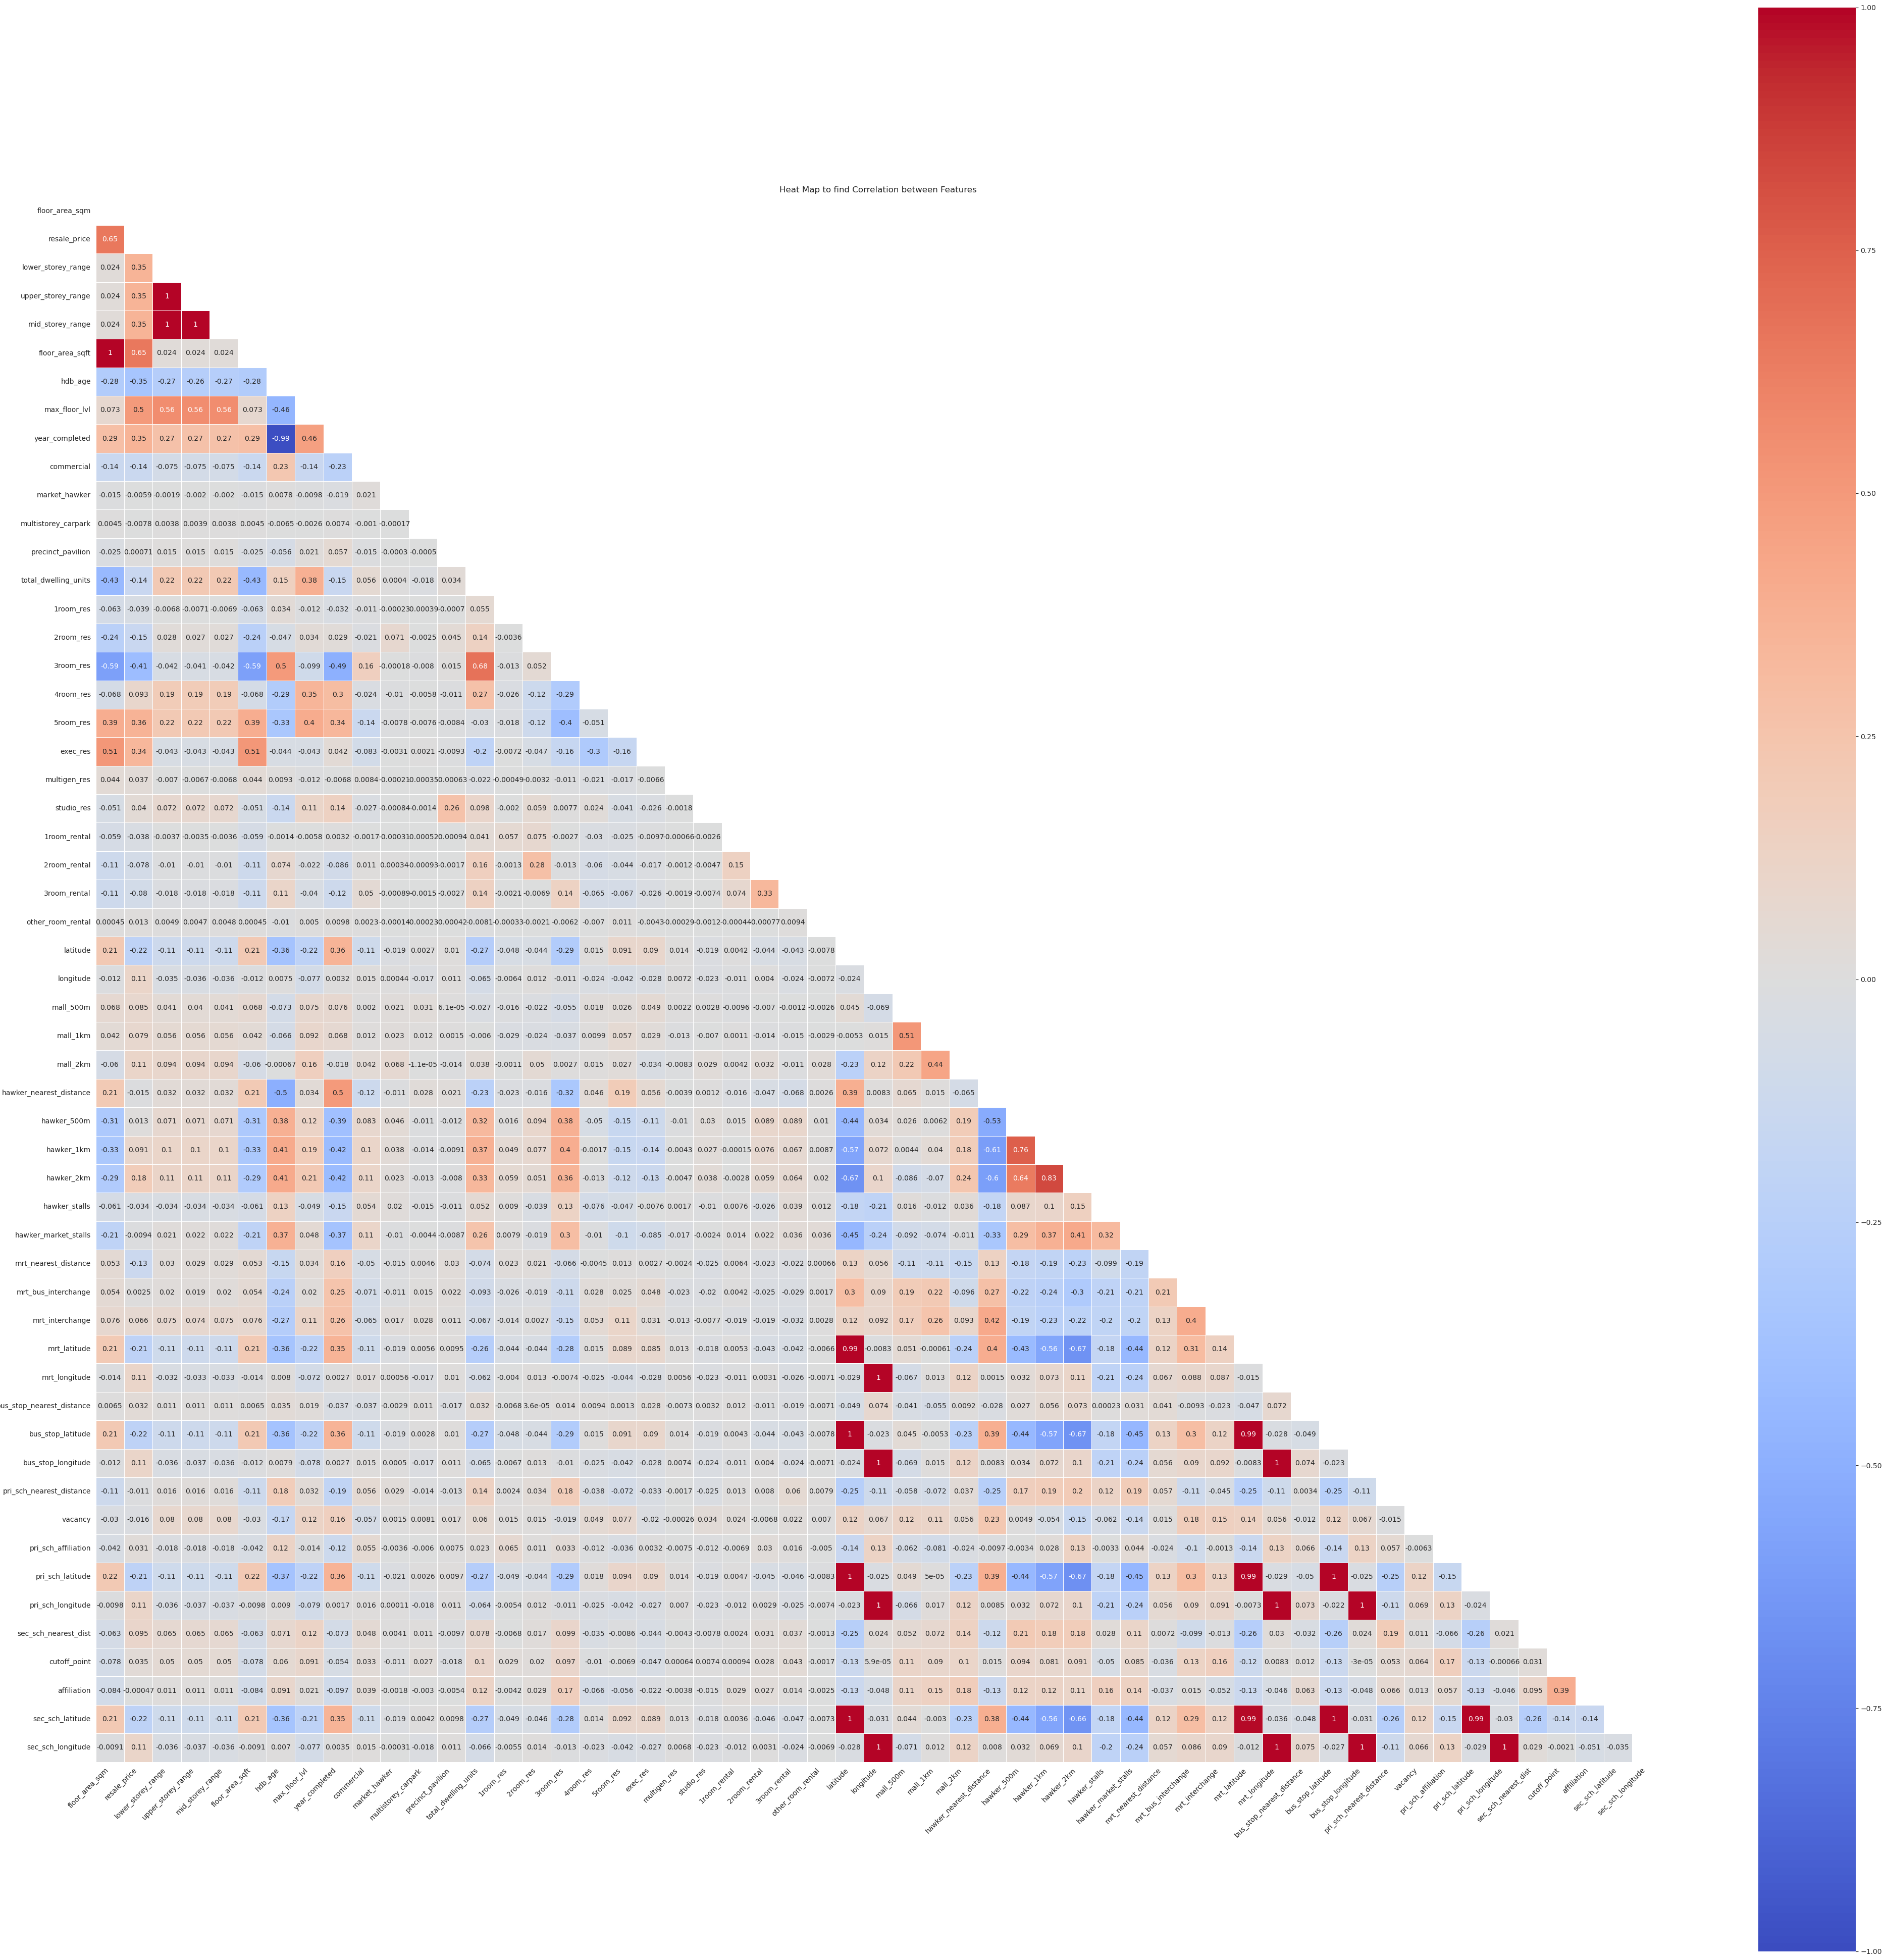

In [55]:
plt.figure(figsize = (50,50))

# Get correlation of variables. (statistical significance)
corr = housing.corr(numeric_only = True)

# Set up mask to be "True" in the upper triangle.
# because it will be the mirror image of lower triangle we'll see on our plot.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='coolwarm')

plt.xticks(rotation = 45, ha="right")
plt.title('Heat Map to find Correlation between Features');

In [56]:
# filter to only 'resale_price' col as that is our response that we want to chk correlation vs other feature cols
housing.corr(numeric_only=True)['resale_price']

floor_area_sqm               0.654120
resale_price                 1.000000
lower_storey_range           0.352466
upper_storey_range           0.353552
mid_storey_range             0.353213
floor_area_sqft              0.654120
hdb_age                     -0.350337
max_floor_lvl                0.495650
year_completed               0.353698
commercial                  -0.140183
market_hawker               -0.005940
multistorey_carpark         -0.007799
precinct_pavilion            0.000715
total_dwelling_units        -0.140725
1room_res                   -0.039434
2room_res                   -0.145287
3room_res                   -0.410368
4room_res                    0.092600
5room_res                    0.359434
exec_res                     0.337500
multigen_res                 0.037406
studio_res                   0.040312
1room_rental                -0.037993
2room_rental                -0.077548
3room_rental                -0.079965
other_room_rental            0.013049
latitude    

In [57]:
# sort_values sorts smallest to largest by default, we can change that by toggling the parameter 'ascending'
p_val = housing.corr(numeric_only=True)['resale_price'].sort_values(ascending=False)

# Filtering to top correlated features with pearson coeff > 0.5
p_val_high = p_val[p_val>0.5]

p_val_high

resale_price       1.00000
floor_area_sqm     0.65412
floor_area_sqft    0.65412
Name: resale_price, dtype: float64

In [58]:
# Check if there are other correlated cols
p_val = housing.corr(numeric_only=True)['floor_area_sqm'].sort_values(ascending=False)

# filtering to top correlated features with pearson coeff > 0.9
p_val_high = p_val[p_val>0.9]

p_val_high

floor_area_sqm     1.0
floor_area_sqft    1.0
Name: floor_area_sqm, dtype: float64

- `floor_area_sqm` and `floor_area_sqft` are highly correlated to `resale_price`
- In fact, the two columns are highly correlated to each other thus one can be dropped.
- Since there are no other columns which are highly correlated to `resale_price`, there will not be feature engineering done here.

In [59]:
# Check if there are other correlated cols
p_val = housing.corr(numeric_only=True)['lower_storey_range'].sort_values(ascending=False)

# filtering to top correlated features with pearson coeff > 0.9
p_val_high = p_val[p_val>0.9]

p_val_high

lower_storey_range    1.000000
mid_storey_range      0.999423
upper_storey_range    0.997688
Name: lower_storey_range, dtype: float64

In [60]:
# Check if there are other correlated cols
p_val = housing.corr(numeric_only=True)['latitude'].sort_values(ascending=False)

# filtering to top correlated features with pearson coeff > 0.9
p_val_high = p_val[p_val>0.9]

p_val_high

latitude             1.000000
bus_stop_latitude    0.999819
pri_sch_latitude     0.997589
sec_sch_latitude     0.995945
mrt_latitude         0.992878
Name: latitude, dtype: float64

In [61]:
# Check if there are other correlated cols
p_val = housing.corr(numeric_only=True)['longitude'].sort_values(ascending=False)

# filtering to top correlated features with pearson coeff > 0.9
p_val_high = p_val[p_val>0.9]

p_val_high

longitude             1.000000
bus_stop_longitude    0.999937
pri_sch_longitude     0.999227
sec_sch_longitude     0.998698
mrt_longitude         0.996590
Name: longitude, dtype: float64

- `floor_area_sqm` is highly correlated to `floor_area_sqft`
- `lower_storey_range`, `mid_storey_range` and `upper_storey_range` are highly correlated
- `latitude`, `bus_stop_latitude`, `pri_sch_latitude`, `sec_sch_latitude` and `mrt_latitude` are highly correlated
- `longitude`, `bus_stop_longitude`, `pri_sch_longitude`, `sec_sch_longitude` and `mrt_longitude` are highly correlated
- Thus, one of the highly correlated columns can remain while the rest can be dropped.

When any of the correlated columns are dropped, the scores did even worse. So none of the columns will be dropped.

#### Investigate the trend in resale prices based on the different flat types

Since resale price is correlated to the area of the flat, we will investigate the trend in resale prices based on the different flat types.

In [62]:
# Find the trend in housing resale prices based on different flat types
# Find the years included in the dataset
print(housing['tranc_year'].min())
print(housing['tranc_year'].max())

2012
2021


In [63]:
# Find number of years included in the dataset
2021-2012+1

10

In [64]:
# Find the number of flats based on the different flat types
housing['flat_type'].value_counts()

4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

In [65]:
# Find the mean house price for each flat type across the years
price_mean_1rm = []
for i in list(range(2012,2022)):
    price_mean_1rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='1 ROOM')].resale_price.mean())

price_mean_2rm = []
for i in list(range(2012,2022)):
    price_mean_2rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='2 ROOM')].resale_price.mean())

price_mean_3rm = []
for i in list(range(2012,2022)):
    price_mean_3rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='3 ROOM')].resale_price.mean())

price_mean_4rm = []
for i in list(range(2012,2022)):
    price_mean_4rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='4 ROOM')].resale_price.mean())

price_mean_5rm = []
for i in list(range(2012,2022)):
    price_mean_5rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='5 ROOM')].resale_price.mean())

price_mean_exec = []
for i in list(range(2012,2022)):
    price_mean_exec.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean())

price_mean_mg = []
for i in list(range(2012,2022)):
    price_mean_mg.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean())

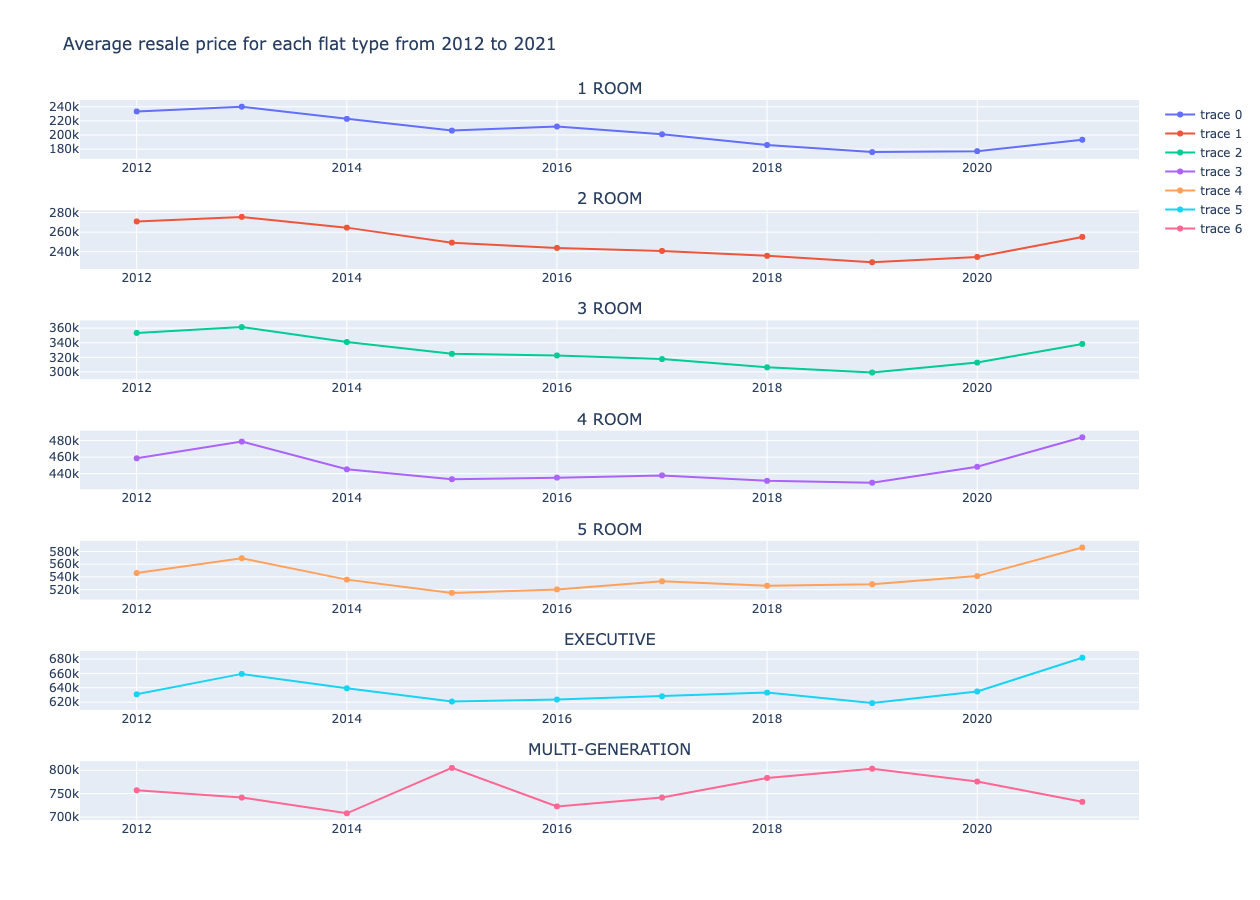

In [66]:
# Plot the graph to show the average resale price for each flat type
fig = make_subplots(rows=7, cols=1, subplot_titles=('1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'))

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_1rm,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_2rm,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_3rm,
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_4rm,
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_5rm,
), row=5, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_exec,
), row=6, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_mg,
), row=7, col=1)

fig.update_layout(height=900, width=800, title_text="Average resale price for each flat type from 2012 to 2021")
fig.show()

In [67]:
# Find percentage increase in resale prices across different flat types from 2019 to 2021
one_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='1 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='1 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='1 ROOM')].resale_price.mean()) * 100
two_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='2 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='2 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='2 ROOM')].resale_price.mean()) * 100
three_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='3 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='3 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='3 ROOM')].resale_price.mean()) * 100
four_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='4 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='4 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='4 ROOM')].resale_price.mean()) * 100
five_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='5 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='5 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='5 ROOM')].resale_price.mean()) * 100
exec_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean()) * 100
mg_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean()) * 100

In [68]:
print(f"1-room: {one_room_perc}%")
print(f"2-room: {two_room_perc}%")
print(f"3-room: {three_room_perc}%")
print(f"4-room: {four_room_perc}%")
print(f"5-room: {five_room_perc}%")
print(f"Executive: {exec_perc}%")
print(f"Multi-generation: {mg_perc}%")

1-room: 9.921328118877454%
2-room: 11.322592451455616%
3-room: 13.08522374516743%
4-room: 12.821732747855021%
5-room: 10.978473776057559%
Executive: 10.203018528652368%
Multi-generation: -8.815308571485474%


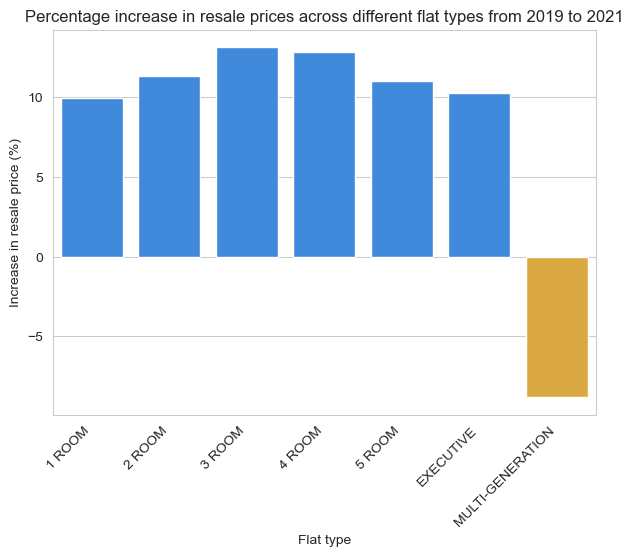

In [69]:
# Plot the graph to show the percentage increase across different flat types
fig = plt.figure(figsize =(7, 5))
sns.set_style('whitegrid')
x = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
y = [one_room_perc, two_room_perc, three_room_perc, four_room_perc, five_room_perc, exec_perc, mg_perc]

sns.barplot(x=x, y=y, palette = [(39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (245/255, 178/255, 39/255, 0.65)])
plt.title('Percentage increase in resale prices across different flat types from 2019 to 2021')
plt.xlabel('Flat type')
plt.xticks(rotation = 45, ha="right") 
plt.ylabel('Increase in resale price (%)');

- Resale prices have seen a downward trend across most flat types from 2013 to 2019, with the exception of multi-generation flat type.
- This fall in resale prices is due to the [reduction of the Mortgage Servicing Ratio (MSR)](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/) introduced in 2013 and the increase in BTO supply.
- From 2019 to 2021, most of the resale prices have bounced back up across most flat types, with the exception of multi-generation flat type. The percentage increase is led by 3-room flats at 13.1%, followed by 4-room flats at 12.8% and 2-room flats at 11.3%.
- This rise in resale prices coincides with the start of Covid-19 in which most of the construction and completion of Build-to-Order (BTO) flats was delayed due to government restrictions, causing a fall in supply of new-builds and new homeowners having to turn to the resale market. 
- There were only 56 multi-generation flats transacted over the 10 years of analysis in the dataset. According to [99.co](https://www.99.co/singapore/insider/is-buying-a-multigenerational-hdb-flat-a-good-idea/), there are many factors involved in getting such a flat so the model might not be able to predict the price of such flats well.

In [70]:
# Since the price of the flats changes based on three periods in 'tranc_year', a column will be feature engineered
housing['tranc_year_period'] = ['2012-2013' if (i==2012 or i==2013) else '2014-2019' if (i>=2014 and i<=2019) else '2020-2021' for i in housing['tranc_year'].values]
housing['tranc_year_period'].head()

0    2014-2019
1    2012-2013
2    2012-2013
3    2012-2013
4    2014-2019
Name: tranc_year_period, dtype: object

The score of the model became worse with this new feature, so it will not be engineered.

In [71]:
housing.drop(['tranc_year_period'], axis=1, inplace=True)
housing.head(2)

flat_type storey_range  floor_area_sqm flat_model lease_commence_year  \
0    4 ROOM     10 TO 12            90.0    Model A                2006   
1    5 ROOM     07 TO 09           130.0   Improved                1987   

   resale_price tranc_year tranc_month  lower_storey_range  \
0      680000.0       2016           5                  10   
1      665000.0       2012           7                   7   

   upper_storey_range  ...  vacancy  pri_sch_affiliation  pri_sch_latitude  \
0                  12  ...       78                 True          1.317659   
1                   9  ...       45                 True          1.349783   

   pri_sch_longitude  sec_sch_nearest_dist  \
0         103.882504           1138.633422   
1         103.854529            447.894399   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224        False   
1  Kuo Chuan Presbyterian Secondary School           232        False   

   sec_sch_latitude  sec_sch_longitude  
0          1.317659         103.882504  
1          1.350110         103.854892  

[2 rows x 65 columns]

#### Investigate the trend in resale prices based on the planning areas

Since the lasso model places great importance on the planning areas in determining resale prices, we will investigate the trend of the resale prices based on the planning area the flats are in.

In [72]:
# Find the number of flats in the different planning areas
housing['planning_area'].value_counts()

Jurong West                11451
Woodlands                  11334
Sengkang                   11069
Tampines                   10506
Yishun                     10042
Bedok                       9062
Punggol                     7793
Hougang                     7557
Ang Mo Kio                  6908
Choa Chu Kang               6328
Bukit Merah                 5854
Bukit Batok                 5700
Bukit Panjang               5686
Toa Payoh                   4817
Pasir Ris                   4725
Queenstown                  4103
Geylang                     3986
Sembawang                   3723
Clementi                    3633
Jurong East                 3470
Kallang                     3163
Serangoon                   3121
Bishan                      2871
Novena                      1091
Marine Parade                943
Outram                       759
Rochor                       468
Bukit Timah                  362
Changi                        38
Downtown Core                 31
Tanglin   

We can see that there are more transactions in the heartland areas instead of central Singapore, thus prospective investors can be recommended heartland areas so that there will be a demand when they would like to resell for a profit. We will investigate on planning areas with at least 1000 transactions.

In [73]:
# Find the mean house price in each planning area across the years
price_mean_jurongwest = []
for i in list(range(2012,2022)):
    price_mean_jurongwest.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Jurong West')].resale_price.mean())

price_mean_woodlands = []
for i in list(range(2012,2022)):
    price_mean_woodlands.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Woodlands')].resale_price.mean())

price_mean_sengkang = []
for i in list(range(2012,2022)):
    price_mean_sengkang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Sengkang')].resale_price.mean())

price_mean_tampines = []
for i in list(range(2012,2022)):
    price_mean_tampines.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Tampines')].resale_price.mean())

price_mean_yishun = []
for i in list(range(2012,2022)):
    price_mean_yishun.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Yishun')].resale_price.mean())

price_mean_bedok = []
for i in list(range(2012,2022)):
    price_mean_bedok.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bedok')].resale_price.mean())

price_mean_punggol = []
for i in list(range(2012,2022)):
    price_mean_punggol.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Punggol')].resale_price.mean())

price_mean_hougang = []
for i in list(range(2012,2022)):
    price_mean_hougang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Hougang')].resale_price.mean())

price_mean_amk = []
for i in list(range(2012,2022)):
    price_mean_amk.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean())

price_mean_cck = []
for i in list(range(2012,2022)):
    price_mean_cck.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean())

price_mean_bukitmerah = []
for i in list(range(2012,2022)):
    price_mean_bukitmerah.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bukit Merah')].resale_price.mean())

price_mean_bukitbatok = []
for i in list(range(2012,2022)):
    price_mean_bukitbatok.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bukit Batok')].resale_price.mean())

price_mean_bukitpanjang = []
for i in list(range(2012,2022)):
    price_mean_bukitpanjang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean())

price_mean_tpy = []
for i in list(range(2012,2022)):
    price_mean_tpy.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Toa Payoh')].resale_price.mean())

price_mean_pasirris = []
for i in list(range(2012,2022)):
    price_mean_pasirris.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Pasir Ris')].resale_price.mean())

price_mean_queenstown = []
for i in list(range(2012,2022)):
    price_mean_queenstown.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Queenstown')].resale_price.mean())

price_mean_geylang = []
for i in list(range(2012,2022)):
    price_mean_geylang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Geylang')].resale_price.mean())

price_mean_sembawang = []
for i in list(range(2012,2022)):
    price_mean_sembawang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Sembawang')].resale_price.mean())

price_mean_clementi = []
for i in list(range(2012,2022)):
    price_mean_clementi.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Clementi')].resale_price.mean())

price_mean_jurongeast = []
for i in list(range(2012,2022)):
    price_mean_jurongeast.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Jurong East')].resale_price.mean())

price_mean_kallang = []
for i in list(range(2012,2022)):
    price_mean_kallang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Kallang')].resale_price.mean())

price_mean_serangoon = []
for i in list(range(2012,2022)):
    price_mean_serangoon.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Serangoon')].resale_price.mean())

price_mean_bishan = []
for i in list(range(2012,2022)):
    price_mean_bishan.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bishan')].resale_price.mean())

price_mean_novena = []
for i in list(range(2012,2022)):
    price_mean_novena.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Novena')].resale_price.mean())

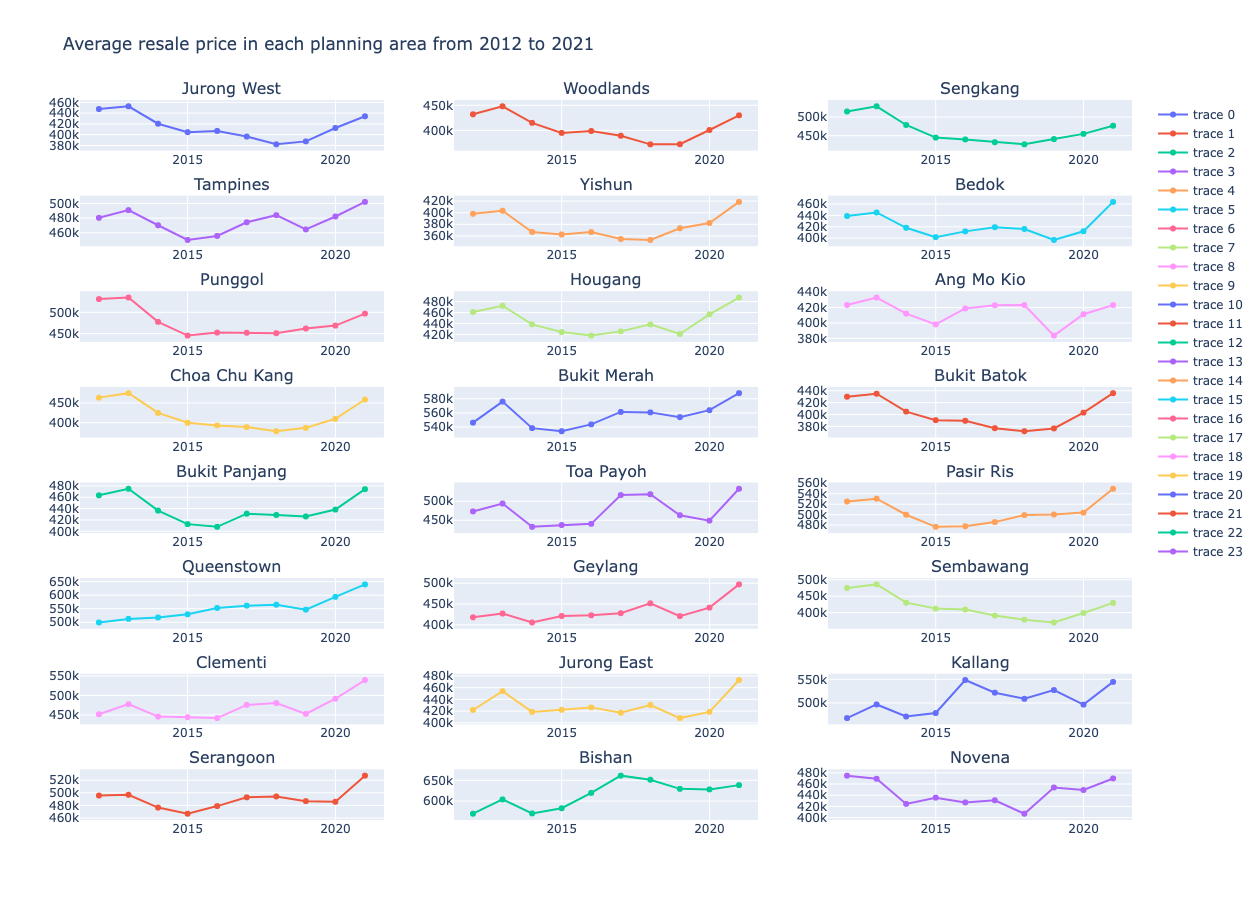

In [74]:
# Plot the graph to show the average resale price in each planning area
fig = make_subplots(rows=8, cols=3, subplot_titles=('Jurong West', 'Woodlands', 'Sengkang', 'Tampines', 'Yishun', 'Bedok', 'Punggol', 'Hougang', 'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Merah', 'Bukit Batok', 'Bukit Panjang', 'Toa Payoh', 'Pasir Ris', 'Queenstown', 'Geylang', 'Sembawang', 'Clementi', 'Jurong East', 'Kallang', 'Serangoon', 'Bishan', 'Novena'))

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_jurongwest),
              row=1, col=1)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_woodlands),
              row=1, col=2)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_sengkang),
              row=1, col=3)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_tampines),
              row=2, col=1)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_yishun),
              row=2, col=2)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bedok),
              row=2, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_punggol),
              row=3, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_hougang),
              row=3, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_amk),
              row=3, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_cck),
              row=4, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bukitmerah),
              row=4, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bukitbatok),
              row=4, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bukitpanjang),
              row=5, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_tpy),
              row=5, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_pasirris),
              row=5, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_queenstown),
              row=6, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_geylang),
              row=6, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_sembawang),
              row=6, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_clementi),
              row=7, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_jurongeast),
              row=7, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_kallang),
              row=7, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_serangoon),
              row=8, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bishan),
              row=8, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_novena),
              row=8, col=3)

fig.update_layout(height=900, width=1000, title_text="Average resale price in each planning area from 2012 to 2021")
fig.show()

Most planning areas see an increase in resale prices from 2019 to 2021 as well.

In [75]:
# Find percentage increase in resale price across different planning areas from 2019 to 2021
jurongwest_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Jurong West')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong West')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong West')].resale_price.mean()) * 100
woodlands_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Woodlands')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Woodlands')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Woodlands')].resale_price.mean()) * 100
sengkang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Sengkang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sengkang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sengkang')].resale_price.mean()) * 100
tampines_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Tampines')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Tampines')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Tampines')].resale_price.mean()) * 100
yishun_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Yishun')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Yishun')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Yishun')].resale_price.mean()) * 100
bedok_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bedok')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bedok')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bedok')].resale_price.mean()) * 100
punggol_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Punggol')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Punggol')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Punggol')].resale_price.mean()) * 100
hougang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Hougang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Hougang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Hougang')].resale_price.mean()) * 100
amk_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean()) * 100
cck_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean()) * 100
bukitmerah_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bukit Merah')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Merah')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Merah')].resale_price.mean()) * 100
bukitbatok_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bukit Batok')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Batok')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Batok')].resale_price.mean()) * 100
bukitpanjang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean()) * 100
tpy_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Toa Payoh')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Toa Payoh')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Toa Payoh')].resale_price.mean()) * 100
pasirris_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Pasir Ris')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Pasir Ris')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Pasir Ris')].resale_price.mean()) * 100
queenstown_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Queenstown')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Queenstown')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Queenstown')].resale_price.mean()) * 100
geylang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Geylang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Geylang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Geylang')].resale_price.mean()) * 100
sembawang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Sembawang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sembawang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sembawang')].resale_price.mean()) * 100
clementi_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Clementi')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Clementi')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Clementi')].resale_price.mean()) * 100
jurongeast_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Jurong East')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong East')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong East')].resale_price.mean()) * 100
kallang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Kallang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Kallang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Kallang')].resale_price.mean()) * 100
serangoon_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Serangoon')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Serangoon')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Serangoon')].resale_price.mean()) * 100
bishan_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bishan')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bishan')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bishan')].resale_price.mean()) * 100
novena_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Novena')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Novena')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Novena')].resale_price.mean()) * 100

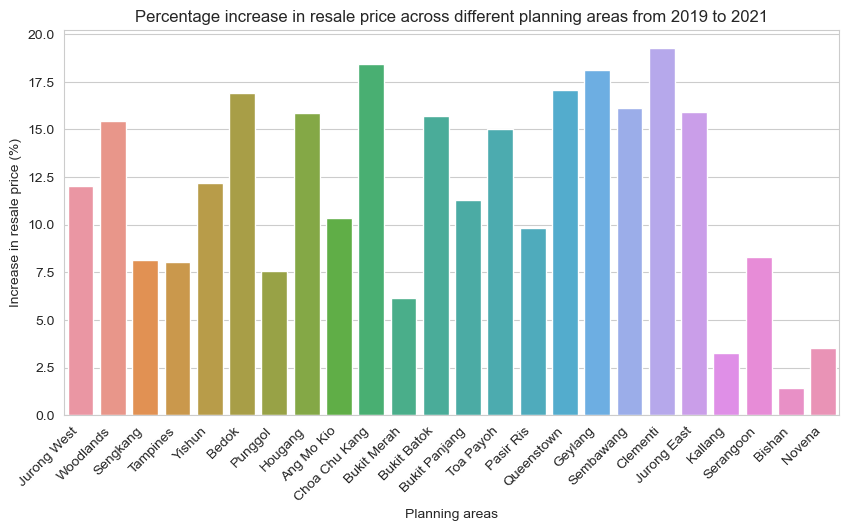

In [76]:
# Plot the graph to show percentage increase in resale price across different planning areas
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x = ['Jurong West', 'Woodlands', 'Sengkang', 'Tampines', 'Yishun', 'Bedok', 'Punggol', 'Hougang', 'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Merah', 'Bukit Batok', 'Bukit Panjang', 'Toa Payoh', 'Pasir Ris', 'Queenstown', 'Geylang', 'Sembawang', 'Clementi', 'Jurong East', 'Kallang', 'Serangoon', 'Bishan', 'Novena']
y = [jurongwest_perc, woodlands_perc, sengkang_perc, tampines_perc, yishun_perc, bedok_perc, punggol_perc, hougang_perc, amk_perc, cck_perc, bukitmerah_perc, bukitbatok_perc, bukitpanjang_perc, tpy_perc, pasirris_perc, queenstown_perc, geylang_perc, sembawang_perc, clementi_perc, jurongeast_perc, kallang_perc, serangoon_perc, bishan_perc, novena_perc]

sns.barplot(x=x, y=y)
plt.title('Percentage increase in resale price across different planning areas from 2019 to 2021')
plt.xlabel('Planning areas')
plt.xticks(rotation = 45, ha="right") 
plt.ylabel('Increase in resale price (%)');

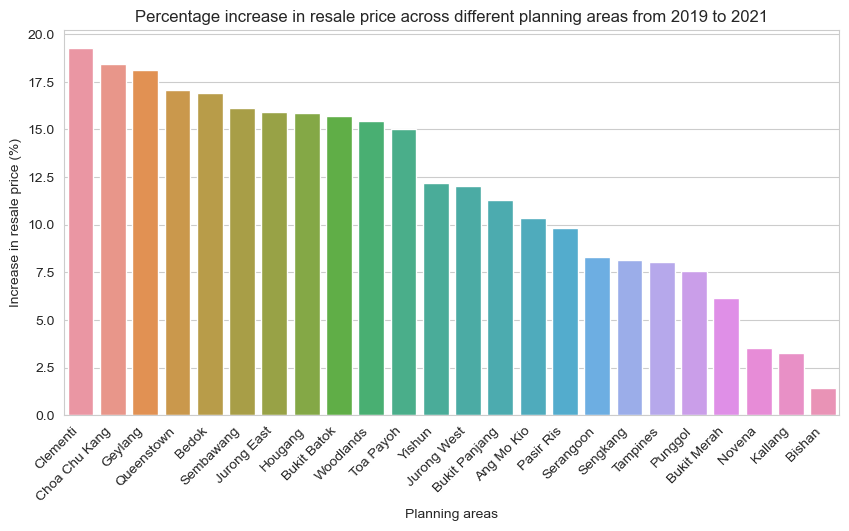

In [77]:
# Rearranging the bars in descending order
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x = ['Clementi', 'Choa Chu Kang', 'Geylang', 'Queenstown', 'Bedok', 'Sembawang', 'Jurong East', 'Hougang', 'Bukit Batok', 'Woodlands', 'Toa Payoh', 'Yishun', 'Jurong West', 'Bukit Panjang', 'Ang Mo Kio', 'Pasir Ris', 'Serangoon', 'Sengkang', 'Tampines', 'Punggol', 'Bukit Merah', 'Novena', 'Kallang', 'Bishan']
y = [clementi_perc, cck_perc, geylang_perc, queenstown_perc, bedok_perc, sembawang_perc, jurongeast_perc, hougang_perc, bukitbatok_perc, woodlands_perc, tpy_perc, yishun_perc, jurongwest_perc, bukitpanjang_perc, amk_perc, pasirris_perc, serangoon_perc, sengkang_perc, tampines_perc, punggol_perc, bukitmerah_perc, novena_perc, kallang_perc, bishan_perc]

sns.barplot(x=x, y=y)
plt.title('Percentage increase in resale price across different planning areas from 2019 to 2021')
plt.xlabel('Planning areas')
plt.xticks(rotation = 45, ha="right") 
plt.ylabel('Increase in resale price (%)');

In [78]:
# Find planning areas with at least 15% increase in resale price
print(f"Clement: {clementi_perc}%")
print(f"Choa Chu Kang: {cck_perc}%")
print(f"Geylang: {geylang_perc}%")
print(f"Queenstown: {queenstown_perc}%")
print(f"Bedok: {bedok_perc}%")
print(f"Sembawang: {sembawang_perc}%")
print(f"Jurong East: {jurongeast_perc}%")
print(f"Hougang: {hougang_perc}%")
print(f"Bukit Batok: {bukitbatok_perc}%")
print(f"Woodlands: {woodlands_perc}%")
print(f"Toa Payoh: {tpy_perc}%")

Clement: 19.250441704234568%
Choa Chu Kang: 18.419439258416283%
Geylang: 18.117996146304304%
Queenstown: 17.060456769193273%
Bedok: 16.90792532442126%
Sembawang: 16.11905509167212%
Jurong East: 15.91045200675086%
Hougang: 15.885747659870187%
Bukit Batok: 15.712860087256411%
Woodlands: 15.462618098716433%
Toa Payoh: 15.042036762780386%


In [79]:
print(f"Kallang: {kallang_perc}%")

Kallang: 3.2601992405368785%


- From 2019 to 2021, the planning areas with at least 15% increase in the resale price are in Clementi (19.3%), followed by Choa Chu Kang (18.4%), Geylang (18.1%), Queenstown (17.1%), Bedok (16.9%), Sembawang (16.1%), Jurong East (15.9%), Hougang (15.9%), Bukit Batok (15.7%), Woodlands (15.5%), and Toa Payoh (15.0%). Thus prospective investors can be recommended these high-growth areas.
- However, more research has to be done to find out the reasons for the increase in resale prices in these areas (e.g. new development) and if there are any more upcoming development plans as the resale prices might plateau or have peaked.
> For example, although Kallang has only seen an increase of 3.3% in the resale price form 2019 to 2021, there are plans to [transform the existing Kallang Industrial Estate](https://www.ura.gov.sg/Corporate/Planning/Master-Plan/Urban-Transformations/Kallang-River) in the longer term into an attractive mixed-use precinct along the waterfront. There is also a vision for Kampong Bugis (a stone's throw away from Kallang) to become an attractive residential and recreational precinct that supports active mobility, environmental sustainability, and fosters community interaction.

## Making Predictions

In [80]:
y_preds = ridge.predict(X_test)
print(len(y_preds))
y_preds

37659


array([459075.83289521, 466058.8523587 , 702260.23401342, ...,
       234228.15473377, 392647.36655048, 388275.72500194])

Evaluate using RMSE (for Kaggle comparison)

In [81]:
np.sqrt(metrics.mean_squared_error(y_test, y_preds))

39774.34256796458

## Kaggle data preparation

In [82]:
# Load test data
housing_test = pd.read_csv('./output/housing_test.csv')
print(housing_test.shape)
housing_test.head(2)

(16737, 64)


flat_type storey_range  floor_area_sqm         flat_model  \
0    4 ROOM     07 TO 09            84.0         Simplified   
1    5 ROOM     04 TO 06           112.0  Premium Apartment   

   lease_commence_year  tranc_year  tranc_month  lower_storey_range  \
0                 1987        2012           11                   7   
1                 2008        2019            8                   4   

   upper_storey_range  mid_storey_range  ...  vacancy  pri_sch_affiliation  \
0                   9                 8  ...       92                False   
1                   6                 5  ...       45                False   

   pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  \
0          1.433681         103.832924            156.322353   
1          1.339244         103.698896            739.371688   

                     sec_sch_name  cutoff_point  affiliation  \
0  Ahmad Ibrahim Secondary School           218        False   
1    Jurong West Secondary School           199        False   

   sec_sch_latitude  sec_sch_longitude  
0          1.436235         103.829987  
1          1.335256         103.702098  

[2 rows x 64 columns]

In [83]:
# Datatypes to do with time are changed to string datatypes so that they can be one hot encoded later
housing_test = housing_test.astype({'lease_commence_year':'object', 'tranc_year':'object', 'tranc_month':'object'})
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flat_type                  16737 non-null  object 
 1   storey_range               16737 non-null  object 
 2   floor_area_sqm             16737 non-null  float64
 3   flat_model                 16737 non-null  object 
 4   lease_commence_year        16737 non-null  object 
 5   tranc_year                 16737 non-null  object 
 6   tranc_month                16737 non-null  object 
 7   lower_storey_range         16737 non-null  int64  
 8   upper_storey_range         16737 non-null  int64  
 9   mid_storey_range           16737 non-null  int64  
 10  floor_area_sqft            16737 non-null  float64
 11  hdb_age                    16737 non-null  int64  
 12  max_floor_lvl              16737 non-null  int64  
 13  year_completed             16737 non-null  int

#### Separate predictor variables based on datatypes

In [84]:
housing_test_cont = housing_test.select_dtypes(include=['int64', 'float64'])
housing_test_cat = housing_test.select_dtypes(include=['object', 'bool'])

#### Scale continuous data

In [85]:
housing_test_cont = ss.transform(housing_test_cont)

#### One-hot encoding categorical data

In [86]:
housing_test_cat = enc.transform(housing_test_cat).toarray()

#### Merge predictor variables back

In [87]:
housing_test_cont = pd.DataFrame(housing_test_cont, columns = ss.get_feature_names_out())
housing_test_cat = pd.DataFrame(housing_test_cat, columns = enc.get_feature_names_out())

In [88]:
housing_test = housing_test_cont.join(housing_test_cat)

#### Making predictions

In [89]:
housing_test_preds1 = ridge.predict(housing_test)
print(len(housing_test_preds1))
housing_test_preds1

16737


array([381113.73763243, 477919.67018814, 375027.11978545, ...,
       379995.01061024, 511416.37351576, 396950.55512121])

#### Load submission format

In [90]:
submission = pd.read_csv('../datasets/sample_sub_reg.csv')
print(submission.shape)
submission.head()

(16737, 2)


Id  Predicted
0  114982     500000
1   95653     500000
2   40303     500000
3  109506     500000
4  100149     500000

In [91]:
submission['Predicted'] = housing_test_preds1

In [92]:
submission.head()

Id      Predicted
0  114982  381113.737632
1   95653  477919.670188
2   40303  375027.119785
3  109506  293824.744008
4  100149  423454.411870

#### Save and export submission data

In [93]:
import os
if not os.path.exists('output'):
    os.makedirs('output')
submission.to_csv('output/submission1.csv', index=False)

---

## Conclusions and Recommendations

- We have decided to use a RidgeCV model for this task.
- Our model is able to predict the resale price of the public housing of Singapore with an $R^2$ score of 0.925 on the train dataset and 0.923 on the test dataset.
- With our model, a prospective investor can be recommended a flat which is undervalued on the market based on the model prediction. For instance, if the flat is listed at \\$300,000 but our model predicts that it can be sold for \\$350,000, such a flat will be recommended so that the investor will make a profit.
---
- The resale price is highly correlated to the floor area of the flat, measured in square metres.
- As such, we have investigated the trend of the resale price based on the flat types which generally correspond to the floor area.
- Resale prices have seen a downward trend across most flat types from 2013 to 2019, with the exception of multi-generation flat type.
- This fall in resale prices is due to the [reduction of the Mortgage Servicing Ratio (MSR)](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/) introduced in 2013 and the increase in BTO supply.
- From 2019 to 2021, most of the resale prices have bounced back up across most flat types, with the exception of multi-generation flat type. The percentage increase is led by 3-room flats at 13.1%, followed by 4-room flats at 12.8% and 2-room flats at 11.3%. This shows the bullish demand for such flat types and hence can prove profitable for prospective investors.
- This rise in resale prices coincides with the start of Covid-19 in which most of the construction and completion of Build-to-Order (BTO) flats was delayed due to government restrictions, causing a fall in supply of new-builds and new homeowners having to turn to the resale market. 
---
- Most planning areas see an increase in resale prices from 2019 to 2021 as well.
- From 2019 to 2021, the planning areas with at least 15% increase in the resale price are in Clementi (19.3%), followed by Choa Chu Kang (18.4%), Geylang (18.1%), Queenstown (17.1%), Bedok (16.9%), Sembawang (16.1%), Jurong East (15.9%), Hougang (15.9%), Bukit Batok (15.7%), Woodlands (15.5%), and Toa Payoh (15.0%). Thus, prospective investors can be recommended these high-growth areas.

## Limitations

- There were only a limited 56 multi-generation flats and 81 1-room flats transacted over the 10 years of analysis in the dataset. In addition, according to [99.co](https://www.99.co/singapore/insider/is-buying-a-multigenerational-hdb-flat-a-good-idea/), there are many factors involved in getting multi-generation flats yet are not captured in the dataset so the model might not be able to predict the price of such flats well.
- More research has to be done to find out the reasons for the increase in resale prices in the high-growth areas (e.g. new development) and if there are any more upcoming development plans as the resale prices might plateau or have peaked.
> For example, although Kallang has only seen an increase of 3.3% in the resale price form 2019 to 2021, there are plans to [transform the existing Kallang Industrial Estate](https://www.ura.gov.sg/Corporate/Planning/Master-Plan/Urban-Transformations/Kallang-River) in the longer term into an attractive mixed-use precinct along the waterfront. There is also a vision for Kampong Bugis (a stone's throw away from Kallang) to become an attractive residential and recreational precinct that supports active mobility, environmental sustainability, and fosters community interaction.
- September 2022 saw another set of cooling measures rolled out by the Singapore government to curb house prices thus our model might not be able to extrapolate on future resale prices well.

---

## Pipeline (Extra)

In [94]:
# Create the preprocessing pipelines for both numeric and categorical data
X = housing.drop(['resale_price'], axis=1)
y = housing['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [95]:
# Append classifier to preprocessing pipeline to make a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RidgeCV())]
)

clf.fit(X_train, y_train)
print(f"model train score: {clf.score(X_train, y_train)}")
print(f"model test score: {clf.score(X_test, y_test)}")
clf

model train score: 0.9250854806768379
model test score: 0.9232410189896885


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['floor_area_sqm', 'lower_storey_range', 'upper_storey_range',
       'mid_storey_range', 'floor_area_sqft', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'total_dwelling_units', '1room_res', '2room_res',
       '3room_res', '4room_res', '5room_res', 'exe...
                                                                handle_unknown='ignore'),
                                                  Index(['flat_type', 'storey_range', 'flat_model', 'lease_commence_year',
       'tranc_year', 'tranc_month', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'planning_area', 'mrt_name',
       'mrt_bus_interchange', 'mrt_interchange', 'pri_sch_name',
       'pri_sch_affiliation', 'sec_sch_name', 'affiliation'],
      dtype='object'))])),
                ('classifier', RidgeCV())])